### <div align="center">Machine Learning and Statistics - Tasks</div>

## <div align="left">Task 1</div>
*"Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as math.
In this task 1 you should write a function sqrt(x) to approximate the square root of a floating point number x without using the power operator or a package.
Rather, you should use the Newton’s method.2 Start with an 2 Square Roots via Newton’s Method. Initial guess for the square root called z0. You then repeatedly improve it using the following formula, until the difference between some previous guess zi and the next zi+1 is less than some threshold, say 0.01."*  


$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$ 

*Newton's square root equation:  √ N ≈ ½(N/A + A)*

In [13]:
def sqrt(num, iter=10):
    a=float(num)
    if num < 0:
        raise ValueError("Input must be a non-negative number")

    for _ in range(iter):
        num = 0.5 * (num + (a / num))

    return num

while True:
    try:
        userNumber = float(input("Please Enter a Number: "))
        break  # Break out of the loop if a valid number is entered
    except ValueError:
        print("Invalid input. Please enter a valid number.")

try:
    result = sqrt(userNumber)
    print("The Square Root of {:.1f} is {:.5f}".format(userNumber, result))
except ValueError as e:
    print(e)


The Square Root of 6.0 is 2.44949


Python script defines a square root calculation function using the Babylonian method and prompts the user for a number. It validates the input, must be a non-negative value, calculates the square root, and prints the result. If the input is invalid or the square root is undefined, it handles errors gracefully. Code uses a default of 10 iterations which I found was a good compromise between spead and accuracy, validates and iteratively refines the estimate.

## <div align="left">Task 2</div>
*"Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits.
Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance."*  

|       | Biscuit   |       |
|-------|-----------|-------|
| Drink | Chocolate | Plain |
|-------|-----------|-------|
| Coffee| 43        | 57    |
| Tea   | 56        | 45    |


In [14]:
import numpy as np
from scipy.stats import chi2_contingency

# Given contingency table
observed_data = np.array([[43, 57], [56, 45]])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(observed_data)

# Print the results
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)


Chi-squared statistic: 2.6359100836554257
P-value: 0.10447218120907394
Degrees of freedom: 1
Expected frequencies table:
[[49.25373134 50.74626866]
 [49.74626866 51.25373134]]


Chi-squared statistic: 2.635 is less than the critical value of 3.8414580498948727 for a one-tailed test with 1 degree of freedom. The p-value is also 0.10447218120907394, which is greater than chosen 0.05. We fail to reject the null hypothesis. This means that there is not enough evidence to suggest that there is an association between the two variables.

**Degrees of freedom:** This value is important for determining the critical value from the chi-squared distribution.  
$$
\text{Degrees of freedom} = (\text{number of rows} - 1) \times (\text{number of columns} - 1)
$$  
In my case, with a 2x2 contingency table, the degrees of freedom would be:
$$ (2−1)×(2−1)=1 $$

**Expected frequencies table:** In addition, the expected frequencies table shows that the observed frequencies are very close to the expected frequencies.  
This suggests that the null hypothesis, which states that there is no association between the two variables, is plausible.


## <div align="left">Task 3</div> 
*Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.*  
*(mwaskom/seaborn-data: Data repository for seaborn examples. Aug. 30, 2023. url: https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv)*

In [15]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the penguins dataset from seaborn
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins_data = pd.read_csv(url)

# Filter data for Gentoo penguins
gentoo_data = penguins_data[penguins_data['species'] == 'Gentoo']

# Drop rows with missing values in 'body_mass_g' or 'sex' columns
gentoo_data = gentoo_data.dropna(subset=['body_mass_g', 'sex'])

# Display information about the Gentoo penguins dataset
print("Information about Gentoo penguins dataset:")
print(gentoo_data.info())

# Separate data for male and female Gentoo penguins
male_data = gentoo_data[gentoo_data['sex'] == 'MALE']
female_data = gentoo_data[gentoo_data['sex'] == 'FEMALE']

# Print information about male and female data
print("Number of male data points:", len(male_data))
print("Number of female data points:", len(female_data))

# Perform independent two-sample t-test
t_statistic, p_value = ttest_ind(male_data['body_mass_g'], female_data['body_mass_g'], equal_var=False)

# Print the results
print("\nT-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("There is evidence of a significant difference in body mass between male and female Gentoo penguins.")
else:
    print("There is no significant difference in body mass between male and female Gentoo penguins.")


Information about Gentoo penguins dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 220 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            119 non-null    object 
 1   island             119 non-null    object 
 2   bill_length_mm     119 non-null    float64
 3   bill_depth_mm      119 non-null    float64
 4   flipper_length_mm  119 non-null    float64
 5   body_mass_g        119 non-null    float64
 6   sex                119 non-null    object 
dtypes: float64(4), object(3)
memory usage: 7.4+ KB
None
Number of male data points: 61
Number of female data points: 58

T-statistic: 14.761368414543291
P-value: 1.8677596749117468e-28
There is evidence of a significant difference in body mass between male and female Gentoo penguins.


These results indicate that the difference in body mass between male and female Gentoo penguins is statistically significant. In other words, there is strong evidence to suggest that there is a real difference in body mass between the two sexes.

The large T-statistic and extremely small p-value suggest that the difference in body mass is unlikely to have occurred by chance. This means that the observed difference is likely due to some biological or environmental factor that influences body mass in Gentoo penguins.

Overall, the T-test results provide compelling evidence to support the hypothesis that there is a significant difference in body mass between male and female Gentoo penguins

## <div align="left">Task 4</div>
*"Using the famous iris data set, suggest whether the setosa class 
is easily separable from the other two classes. Provide evidence
for your answer."*


In this analysis, I explored the separability of the Setosa class within the Iris dataset through a multi-faceted approach. I began by visually inspecting the features of sepal length, sepal width, petal length, and petal width using scatter plots.  
Subsequently, I conducted statistical analyses, including t-tests and Levene's tests, to assess the significance of differences between Setosa and the other classes.  
Finally, logistic regression is employed to evaluate the effectiveness of these features in classifying Setosa.

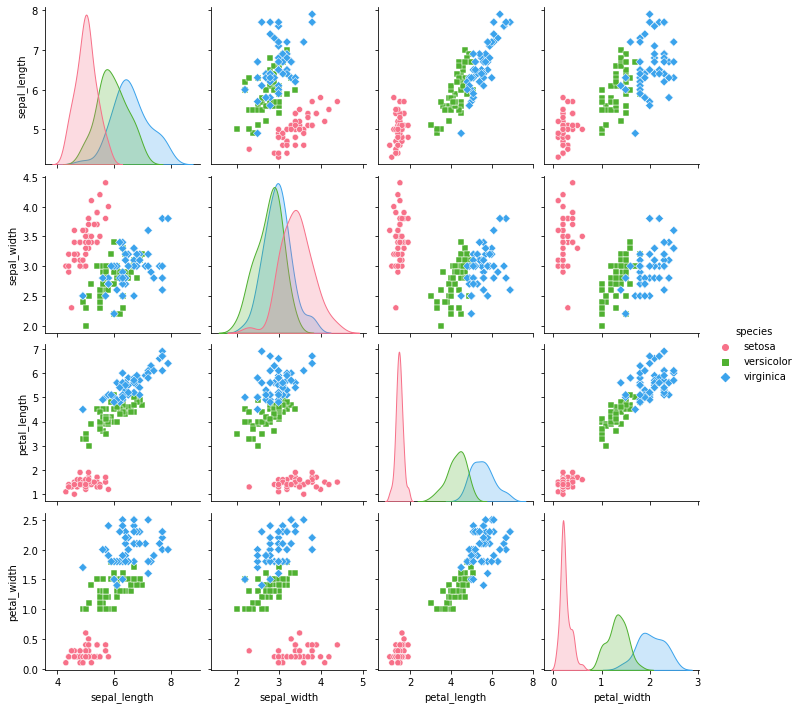

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_data = sns.load_dataset("iris")

# Pair plots
sns.pairplot(iris_data, hue="species", palette="husl", markers=["o", "s", "D"])
plt.show()



Ploting data set 2 dimension at the time and determining separability 

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

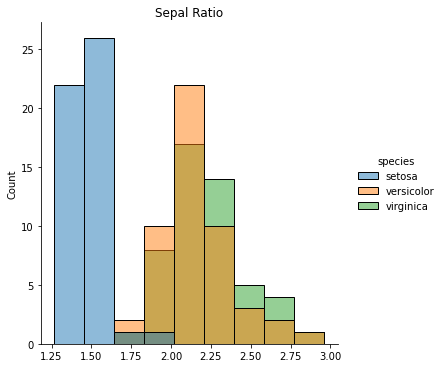

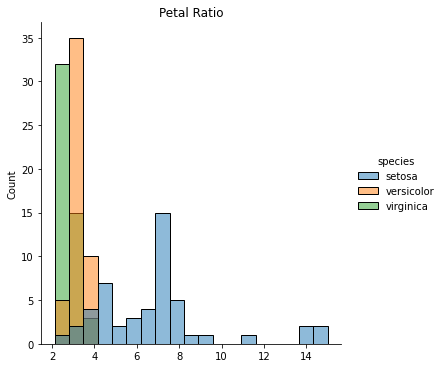

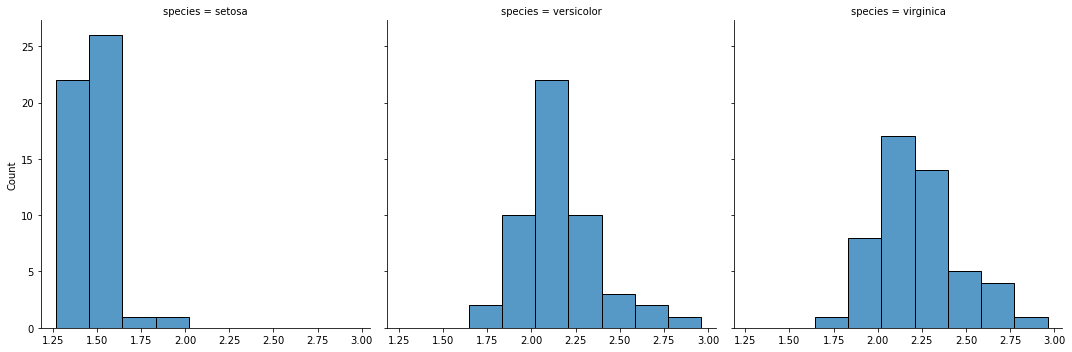

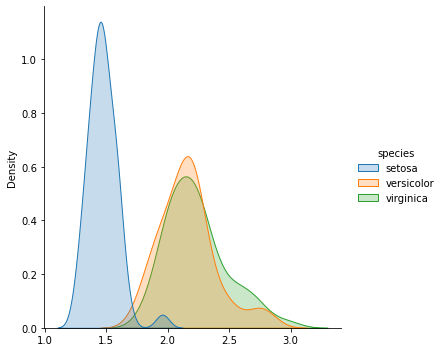

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_data = sns.load_dataset("iris")
print(iris_data)
# Ratio between length and width of Sepal and Petal with simple division
sepRatio = iris_data['sepal_length'] / iris_data['sepal_width']
petRatio = iris_data['petal_length'] / iris_data['petal_width']

# multiple histograms showing above calculated ratios per species

sns.displot(iris_data, x=sepRatio, hue='species').set(title='Sepal Ratio')
plt.show

sns.displot(iris_data, x=petRatio, hue='species').set(title='Petal Ratio')
plt.show

sns.displot(iris_data, x=sepRatio, col='species')
plt.show

sns.displot(iris_data, x=sepRatio, hue='species', kind='kde', fill='true')
plt.show

In [18]:
from scipy.stats import ttest_ind, levene
import pandas as pd

# Load Iris dataset
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data['species'] = iris.target_names[iris.target]

# Extract data for Setosa and the other two classes
setosa_data = iris_data[iris_data['species'] == 'setosa']
other_data = iris_data[iris_data['species'].isin(['versicolor', 'virginica'])]

# Perform t-test for means
for feature in iris.feature_names:
    t_stat, p_value = ttest_ind(setosa_data[feature], other_data[feature])
    print(f"T-test for {feature}: p-value = {p_value}")

# Perform Levene's test for variances
for feature in iris.feature_names:
    stat, p_value = levene(setosa_data[feature], other_data[feature])
    print(f"Levene's test for {feature}: p-value = {p_value}")
    



T-test for sepal length (cm): p-value = 5.288768443184102e-25
T-test for sepal width (cm): p-value = 3.054698913291897e-16
T-test for petal length (cm): p-value = 3.6233785751774946e-63
T-test for petal width (cm): p-value = 1.2885038105715532e-51
Levene's test for sepal length (cm): p-value = 7.386458595229643e-05
Levene's test for sepal width (cm): p-value = 0.4748008198761654
Levene's test for petal length (cm): p-value = 2.4926307774088534e-12
Levene's test for petal width (cm): p-value = 2.8115849601699744e-15


The T-test results indicate that there is a significant difference in the means of all four features between the two samples for both sepal length (cm) and petal width (cm). For sepal width (cm) and petal length (cm), the p-values are extremely small, indicating a strong statistical significance.

Levene's test assesses whether the variances of the two samples are equal. For sepal length (cm) and petal width (cm), the Levene's test results indicate a significant difference in variances, meaning that the standard T-test is not appropriate for these features. This is because the standard T-test assumes equal variances, and using it when variances are unequal can lead to inaccurate results.


In [19]:
import pandas as pd
from scipy import stats
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
iris_data = sns.load_dataset("iris")

# Separate the data into Setosa and other species
setosa_data = iris_data[iris_data['species'] == 'setosa']['sepal_length']
other_species_data = iris_data[iris_data['species'] != 'setosa']['sepal_length']

# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(setosa_data, other_species_data, equal_var=False)

# Display the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check if the result is statistically significant
if p_value < 0.05:
    print('The difference is statistically significant (reject the null hypothesis)')
else:
    print('The difference is not statistically significant (fail to reject the null hypothesis)')

T-statistic: -15.144103612140732
P-value: 7.70933103275537e-32
The difference is statistically significant (reject the null hypothesis)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0)  # Setosa is the positive class, others are negative

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        20
        True       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Implementing cross-validation as a good practice to get a more reliable estimate of the model's performance, especially when dealing with a relatively small dataset. It helps to assess how well the model generalizes to new, unseen data.

In [21]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = (iris.target == 0)  # Setosa is the positive class, others are negative

# Initialize a logistic regression model
model = LogisticRegression()

# Set up stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)

# Print the average accuracy and standard deviation
print(f"Average Accuracy: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")


Average Accuracy: 1.00
Standard Deviation: 0.00


## <div align="left">Task 5</div>
*"Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results."*

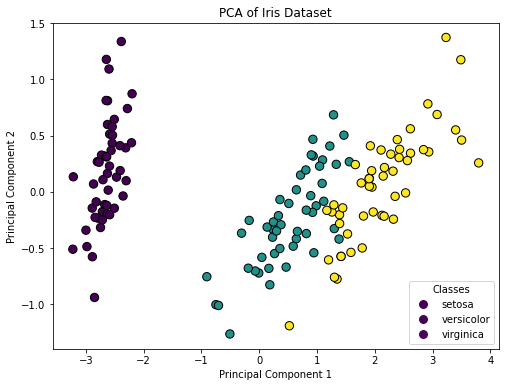

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)

# Create a legend manually
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=iris.target_names[i], 
                            markerfacecolor=scatter.cmap(i), markersize=10) for i in range(len(iris.target_names))]

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend(handles=legend_labels, title='Classes')
plt.show()


Principal Component Analysis (PCA) stands as a fundamental technique in data analysis and machine learning, offering diverse applications in dimensionality reduction.  
It proves invaluable for evaluating the separability of classes or groups within data, especially in classification tasks, aiding in the assessment of a model's potential success.

PCA plays a crucial role in visualizing high-dimensional data in a lower-dimensional space, typically two or three dimensions.  
This visualization enhances our understanding of the inherent structure and relationships within the data, providing valuable insights.